# CUSTOMER ANALYSIS

### 1. Introduction

In this project we have a company with numerous products needs to analyze their customer behavior and
classify them whether they will accept the campaigns held by the company. Also, cluster the
customers into different segments.


Customer analysis:
 
    Customer analysis is a combination of qualitative and quantitative research collected on our customers with the purpose of better understanding them in order to draw meaningful conclusions that will aid us in our marketing and outreach efforts. It allows us to determine the needs of our customers, the types of messaging they respond well to, and why they are or aren't purchasing our product. Armed with this information, we can make the changes necessary to increase growth.


Customer segmentation/clustering

    In the context of customer segmentation, customer clustering analysis is the use of a mathematical model to discover groups of similar customers based on finding the smallest variations among customers within each group. It helps to modify products according to distinct needs and behaviours of the customers.

### 2.Import libraries

By adding necessary libraries can help us save time and write more efficient code.Here we import necessary libaries for data analysis,visualizatio and clustering

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

### 3.Load training and testing data

It is the data we need to load for the project with format csv(comma-seperated values).Training data is the data we use to train an algorithm or machine learning model to predict the outcome we design pur model to predict.Teat data is a production-like set of data used by test cases to determine whether an application is working correctly

In [2]:
trn_data=pd.read_csv("C:\\Users\\USER\\Downloads\\customer_train.csv")
trn_data 

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,...,7,0,0,0,0,0,0,3,11,1
1,1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,...,5,0,0,0,0,0,0,3,11,0
2,2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,...,4,0,0,0,0,0,0,3,11,0
3,3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,...,6,0,0,0,0,0,0,3,11,0
4,4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,1675,1675,4712,1991,D3,Bertunangan,20193000.0,0,0,28-11-2012,...,4,0,0,0,0,0,0,3,11,0
1676,1676,1676,1170,1975,S1,Menikah,27573000.0,1,0,25-03-2013,...,8,0,0,0,0,0,0,3,11,0
1677,1677,1677,6347,1979,SMA,Lajang,15862000.0,1,0,27-06-2013,...,8,0,0,0,0,0,0,3,11,0
1678,1678,1678,4065,1976,S3,Menikah,49544000.0,1,0,12-02-2013,...,7,0,0,0,0,0,0,3,11,0


In [3]:
tst_data=pd.read_csv("C:\\Users\\USER\\Downloads\\customer_test.csv")
tst_data

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1681,1681,5939,1971,S1,Bertunangan,38232000.0,1,1,17-01-2014,...,5,0,0,0,0,0,0,3,11,0
1,1682,1682,2156,1955,S3,Menikah,22554000.0,1,1,03-11-2012,...,5,0,0,0,0,0,0,3,11,0
2,1683,1683,7788,1983,S3,Menikah,23536000.0,1,0,04-06-2014,...,3,0,0,0,0,0,0,3,11,0
3,1684,1684,10323,1952,S1,Menikah,49413000.0,0,1,25-10-2013,...,5,0,0,0,0,0,0,3,11,0
4,1685,1685,7947,1969,S1,Menikah,42231000.0,1,1,25-03-2014,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,...,5,0,0,0,0,0,0,3,11,0
555,2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,...,7,0,0,0,1,0,0,3,11,0
556,2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,...,6,0,1,0,0,0,0,3,11,0
557,2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,...,3,0,0,0,0,0,0,3,11,0


### 4.Exploratory data analysis

Exploratory data analysis (EDA) refers to the method of studying and exploring record sets to apprehend their predominants traits,discover patterns,locate outliers,and identify relationships between variables



### Training data

In [4]:
trn_data.head()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,...,7,0,0,0,0,0,0,3,11,1
1,1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,...,5,0,0,0,0,0,0,3,11,0
2,2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,...,4,0,0,0,0,0,0,3,11,0
3,3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,...,6,0,0,0,0,0,0,3,11,0
4,4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,...,5,0,0,0,0,0,0,3,11,0


In [5]:
trn_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'Year_Birth', 'Education',
       'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
trn_data.describe()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,1680.000000,1680.000000,1680.000000,1680.000000,1.663000e+03,1680.000000,1680.000000,1680.000000,1.680000e+03,1680.000000,...,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.0,1680.0,1680.000000
mean,839.500000,839.500000,5551.728571,1968.847619,5.201434e+07,0.452381,0.500000,49.083333,3.048994e+05,25918.452381,...,5.332143,0.071429,0.074405,0.069048,0.062500,0.011905,0.010119,3.0,11.0,0.144048
std,485.118542,485.118542,3238.155703,12.027192,2.148248e+07,0.546901,0.550055,28.930637,3.387051e+05,39532.059109,...,2.449814,0.257616,0.262507,0.253611,0.242134,0.108490,0.100113,0.0,0.0,0.351243
min,0.000000,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,419.750000,419.750000,2823.250000,1960.000000,3.568800e+07,0.000000,0.000000,24.000000,2.400000e+04,1000.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,839.500000,839.500000,5381.000000,1970.000000,5.125000e+07,0.000000,0.000000,50.000000,1.730000e+05,8000.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1259.250000,1259.250000,8370.750000,1977.000000,6.812200e+07,1.000000,1.000000,74.000000,4.942500e+05,32000.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1679.000000,1679.000000,11191.000000,1996.000000,1.623970e+08,2.000000,2.000000,99.000000,1.492000e+06,199000.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
trn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0.1         1680 non-null   int64  
 1   Unnamed: 0           1680 non-null   int64  
 2   ID                   1680 non-null   int64  
 3   Year_Birth           1680 non-null   int64  
 4   Education            1680 non-null   object 
 5   Marital_Status       1680 non-null   object 
 6   Income               1663 non-null   float64
 7   Kidhome              1680 non-null   int64  
 8   Teenhome             1680 non-null   int64  
 9   Dt_Customer          1680 non-null   object 
 10  Recency              1680 non-null   int64  
 11  MntCoke              1680 non-null   int64  
 12  MntFruits            1680 non-null   int64  
 13  MntMeatProducts      1680 non-null   int64  
 14  MntFishProducts      1680 non-null   int64  
 15  MntSweetProducts     1680 non-null   i

In [8]:
trn_data.isnull().sum()

Unnamed: 0.1            0
Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 17
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

#### From exploratory data analysis we found that

      1.There is null values in column named income
      2.There is some unwanted columns
      3.There is some features having dtype object.so we have to encode them in to numeric forms
  so we have to clear this for making our project to be accurate
      

### 5.Data preprocessing

From the conclusion of exploratory data analysis we need to clear that problems

1.Inorder to fixing null value of column income ,first of all we need to find out the outlier in the column income.There is several methods to find outliers.Here i use method Inter Quartile Range(IQR)

In [9]:

# calculate inter quartile range(IQR)

trn_income=trn_data['Income']
Q1=trn_income.quantile(0.25)
Q3=trn_income.quantile(0.75)
IQR=Q3-Q1

#calculate the minimum and maximum range of outliers

min=Q1-1.5*IQR
max=Q3+1.5*IQR

#to display outliers

trn_outliers=trn_data[(trn_income<min)|(trn_income>max)]
trn_outliers_income=trn_outliers['Income']
print("outliers in the income column are :\n",trn_outliers_income)


outliers in the income column are :
 164     157243000.0
617     162397000.0
655     153924000.0
687     160803000.0
1300    157733000.0
1653    157146000.0
Name: Income, dtype: float64


In [10]:
trn_data=trn_data[(trn_income>=min)&(trn_income<=max)]
print("data without outliers :\n",trn_data['Income'])

data without outliers :
 0       58138000.0
1       46344000.0
2       71613000.0
3       26646000.0
4       58293000.0
           ...    
1675    20193000.0
1676    27573000.0
1677    15862000.0
1678    49544000.0
1679    33228000.0
Name: Income, Length: 1657, dtype: float64


After removing outliers we need to fix null values.Fix null values by replacing the mean value of column Income

In [11]:
#Finding mean value for column Income
trn_incm_mean=trn_data['Income'].mean()
print(trn_incm_mean)

51629817.139408566


In [12]:
#replace this mean for null values
trn_data['Income'].fillna(trn_incm_mean,inplace=True)
trn_data.isnull().sum()

Unnamed: 0.1           0
Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

Now there is no null values in the training data

2.Remove unwanted columns 

In [13]:
# dropping 2 unwanted columns from training data

trn_data =trn_data.drop(["Unnamed: 0.1","Unnamed: 0"], axis='columns')


3.Change data type  from object

In [14]:
#For training data
# converting dtype of Dt_Customer to dtype datetime

trn_data["Dt_Customer"] = pd.to_datetime(trn_data["Dt_Customer"],format='%d-%m-%Y')
trn_data.info()



<class 'pandas.core.frame.DataFrame'>
Index: 1657 entries, 0 to 1679
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   1657 non-null   int64         
 1   Year_Birth           1657 non-null   int64         
 2   Education            1657 non-null   object        
 3   Marital_Status       1657 non-null   object        
 4   Income               1657 non-null   float64       
 5   Kidhome              1657 non-null   int64         
 6   Teenhome             1657 non-null   int64         
 7   Dt_Customer          1657 non-null   datetime64[ns]
 8   Recency              1657 non-null   int64         
 9   MntCoke              1657 non-null   int64         
 10  MntFruits            1657 non-null   int64         
 11  MntMeatProducts      1657 non-null   int64         
 12  MntFishProducts      1657 non-null   int64         
 13  MntSweetProducts     1657 non-null   i

In [15]:
#Handling categorical variables

print("Total categories in the feature Marital_Status:\n",trn_data["Marital_Status"].value_counts(), "\n")


Total categories in the feature Marital_Status:
 Marital_Status
Menikah        642
Bertunangan    431
Lajang         353
Cerai          176
Janda           52
Duda             3
Name: count, dtype: int64 



In [16]:
# Replacing marital status with english synonyms

trn_data["Marital_Status"] =trn_data['Marital_Status'].replace('Menikah','Married')
trn_data["Marital_Status"] =trn_data['Marital_Status'].replace('Bertunangan','Engaged')
trn_data["Marital_Status"] =trn_data['Marital_Status'].replace('Lajang','Bachelor')
trn_data["Marital_Status"] =trn_data['Marital_Status'].replace('Cerai','Divorced')
trn_data["Marital_Status"] =trn_data['Marital_Status'].replace('Janda','Widows')
trn_data["Marital_Status"] =trn_data['Marital_Status'].replace('Duda','Doubt')
trn_data["Marital_Status"].value_counts()

Marital_Status
Married     642
Engaged     431
Bachelor    353
Divorced    176
Widows       52
Doubt         3
Name: count, dtype: int64

In [17]:
# Replacing educational qualification with english synonyms

trn_data["Education"]=trn_data['Education'].replace('S1','BachelorDegree')
trn_data["Education"]=trn_data['Education'].replace('S2','MasterDegree')
trn_data["Education"]=trn_data['Education'].replace('S3','DoctoralDegree')
trn_data["Education"]=trn_data['Education'].replace('D3','Diploma')
trn_data["Education"]=trn_data['Education'].replace('SMA','SubjectMatterAcquaintance')
trn_data["Education"].value_counts()

Education
BachelorDegree               823
DoctoralDegree               366
MasterDegree                 276
Diploma                      157
SubjectMatterAcquaintance     35
Name: count, dtype: int64

### 6.Visualization

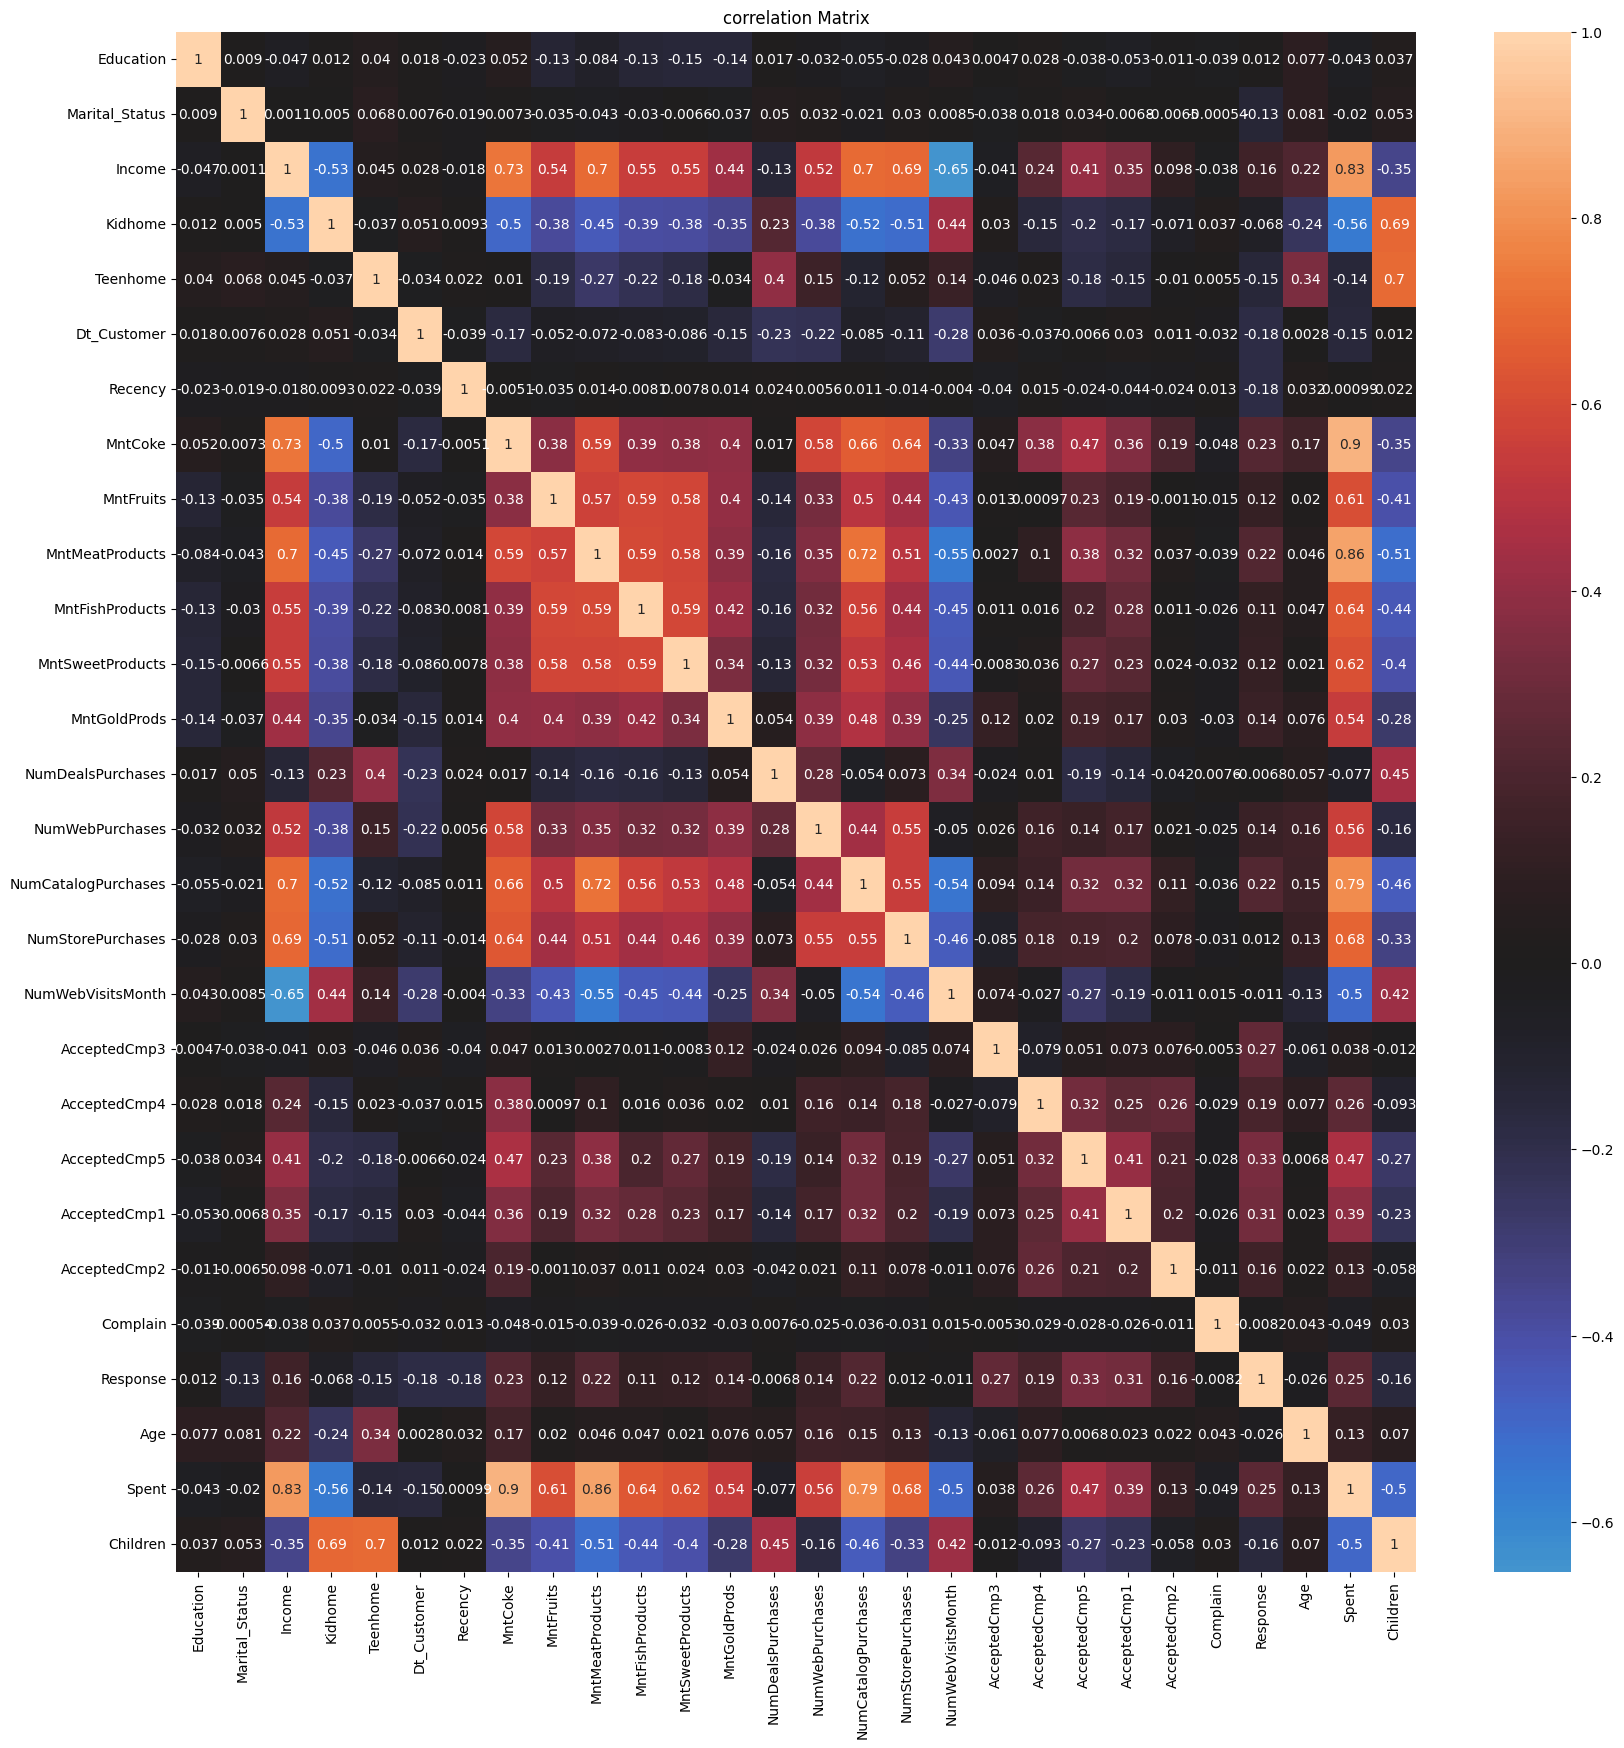

In [199]:
#correlation matrix

corr_matrx= trn_data.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corr_matrx,annot=True, center=0)
plt.title('correlation Matrix')
plt.show()

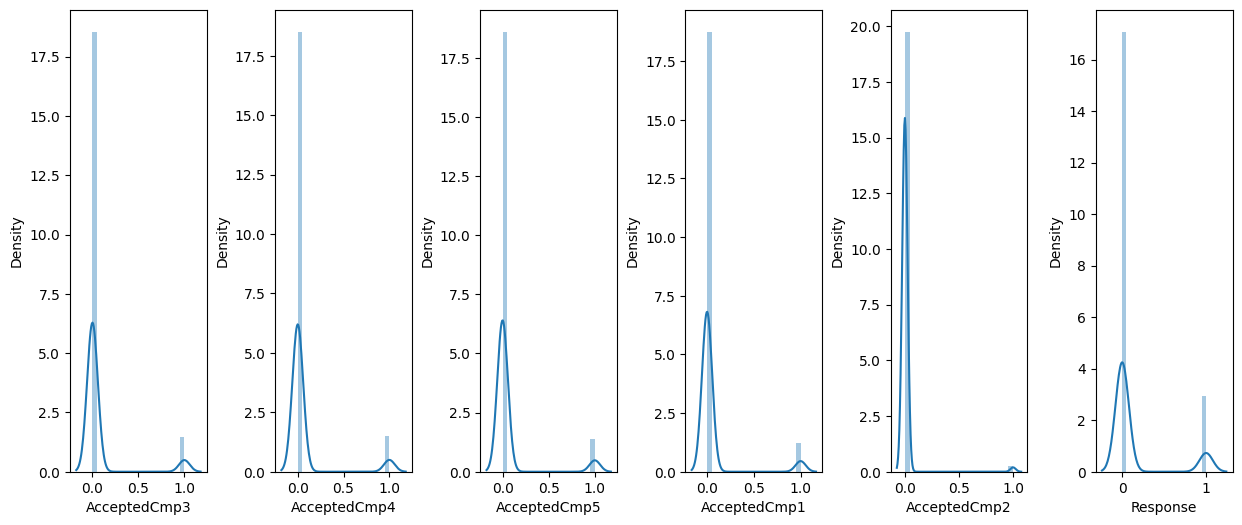

In [194]:
#promotion.finding through which promotion campion more people accept the offer

plt.figure(1,figsize=(15,6))
n=0
for x in [ 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','AcceptedCmp1', 'AcceptedCmp2' ,'Response']:
    n+=1
    plt.subplot(1,6,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(trn_data[x],bins=20)
plt.show()

From the above distplot it's obivious that through the 2nd campaign more people accepted the offer

In [24]:
#Total amount of each customer spent to buy each product in last 2 years

total=trn_data[[ 'MntCoke','MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds']].aggregate('sum')
print(total)                                                                                                            

MntCoke             512231000
MntFruits            43543000
MntMeatProducts     278500000
MntFishProducts      62084000
MntSweetProducts     45388000
MntGoldProds         72811000
dtype: int64


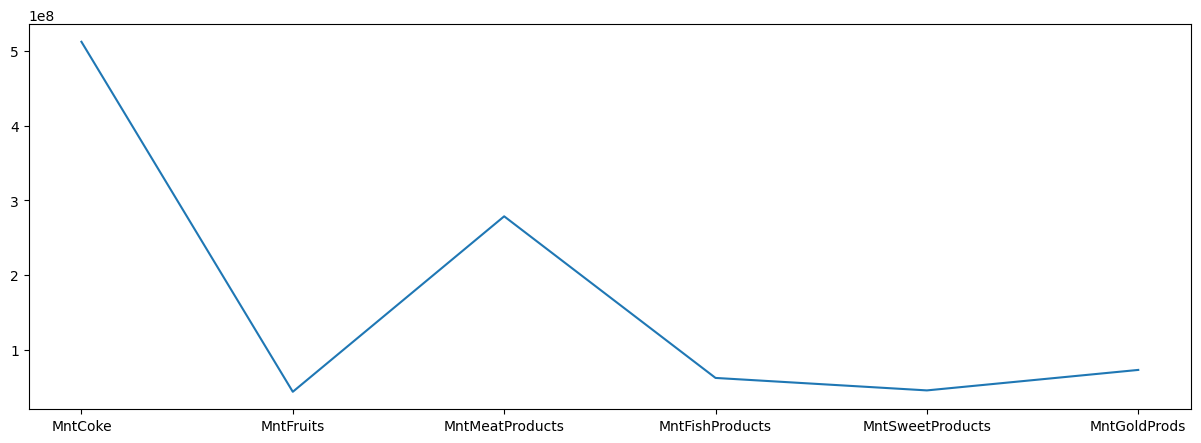

In [25]:
#Finding for which category of product customer spent more amount in last 2 years

plt.figure(figsize=(15,5))
plt.plot(total)
plt.show()

Frome the above plot we get an idea that the customer spend more amount in last 2 years is for coke and least amount spent for fruits

In [26]:
#finding most of customers choose which mode of shoping

order=trn_data[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth']].aggregate('sum')
print(order)

NumWebPurchases        6789
NumCatalogPurchases    4487
NumStorePurchases      9726
NumWebVisitsMonth      8958
dtype: int64


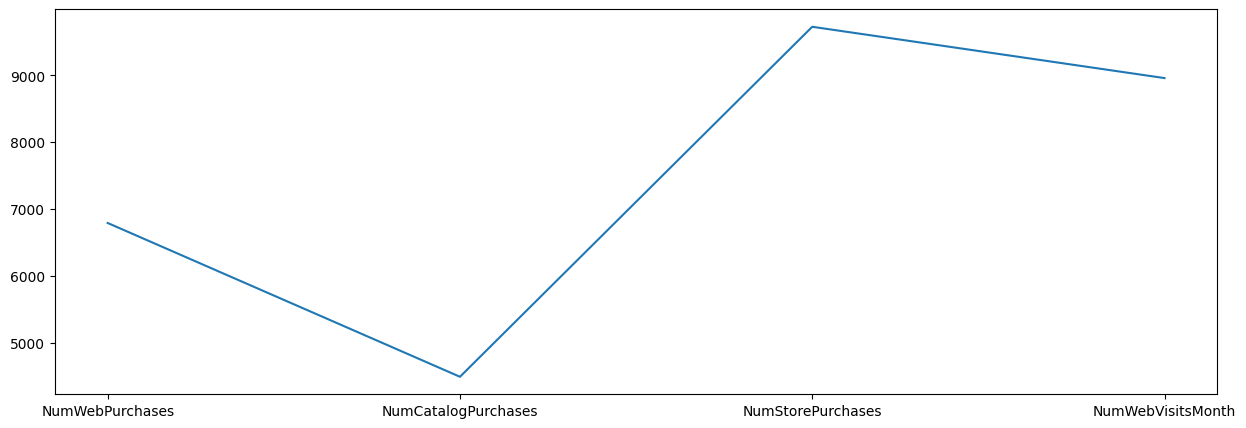

In [27]:
plt.figure(figsize=(15,5))
plt.plot(order)
plt.show()

from the above plot we get that most of the people chooses to purchase directly from the shope and leat people  purchases made using a catalogue

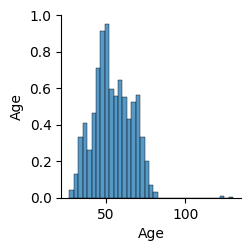

In [28]:
#plot column Age
sns.pairplot(trn_data[['Age']])
plt.show()


Here we can see that outliers in columns age a so we have to remove it

In [29]:
#Dropping the outliers from column Age 
trn_data = trn_data[(trn_data["Age"]<90)]

len(trn_data)

1677

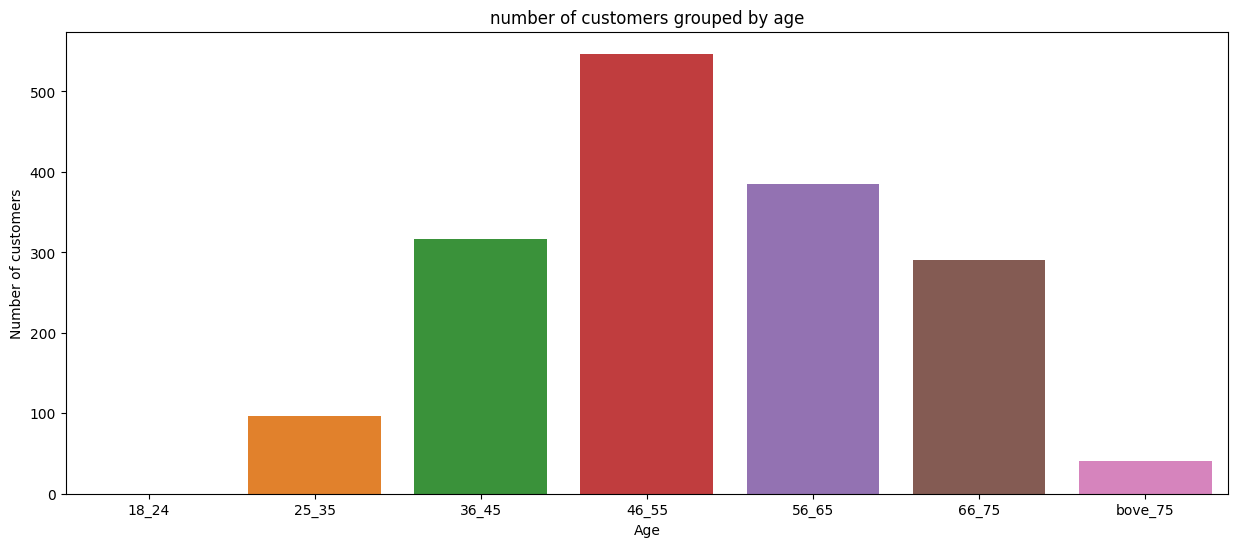

In [30]:
#Find out the number of customers in each age group
age_18_24=trn_data[(trn_data.Age>=18)&(trn_data.Age<=24)]
age_25_35=trn_data[(trn_data.Age>=25)&(trn_data.Age<=35)]
age_36_45=trn_data[(trn_data.Age>=36)&(trn_data.Age<=45)]
age_46_55=trn_data[(trn_data.Age>=46)&(trn_data.Age<=55)]
age_56_65=trn_data[(trn_data.Age>=56)&(trn_data.Age<=65)]
age_66_75=trn_data[(trn_data.Age>=66)&(trn_data.Age<=75)]
age_75above=trn_data[(trn_data.Age>=76)]
age_x=["18_24","25_35","36_45","46_55","56_65","66_75","bove_75",]

age_y=[len(age_18_24.values),len(age_25_35.values),len(age_36_45.values),len(age_46_55.values),len(age_56_65.values),len(age_66_75.values),len(age_75above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=age_x,y=age_y)
plt.title("number of customers grouped by age")
plt.xlabel("Age")
plt.ylabel("Number of customers")
plt.show()

From the plot we can find out that most of the customers are in age group 46_55. And all of them have age above 24

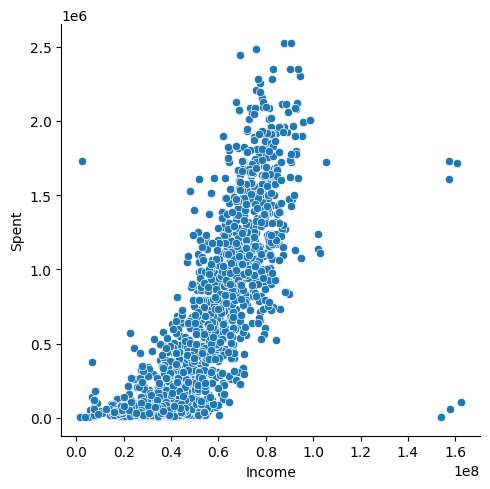

In [31]:
#Finding out relationship between annual income and spending amount

sns.relplot(x="Income",y="Spent",data=trn_data)
plt.show()

From the plot it's clear that there is relationship between annual income and their spenting amount

In [32]:
#T0 categorise customers by their income first we need the minimum and maximum income

print(trn_data["Income"].min(axis=0))
print(trn_data["Income"].max(axis=0))

1730000.0
162397000.0


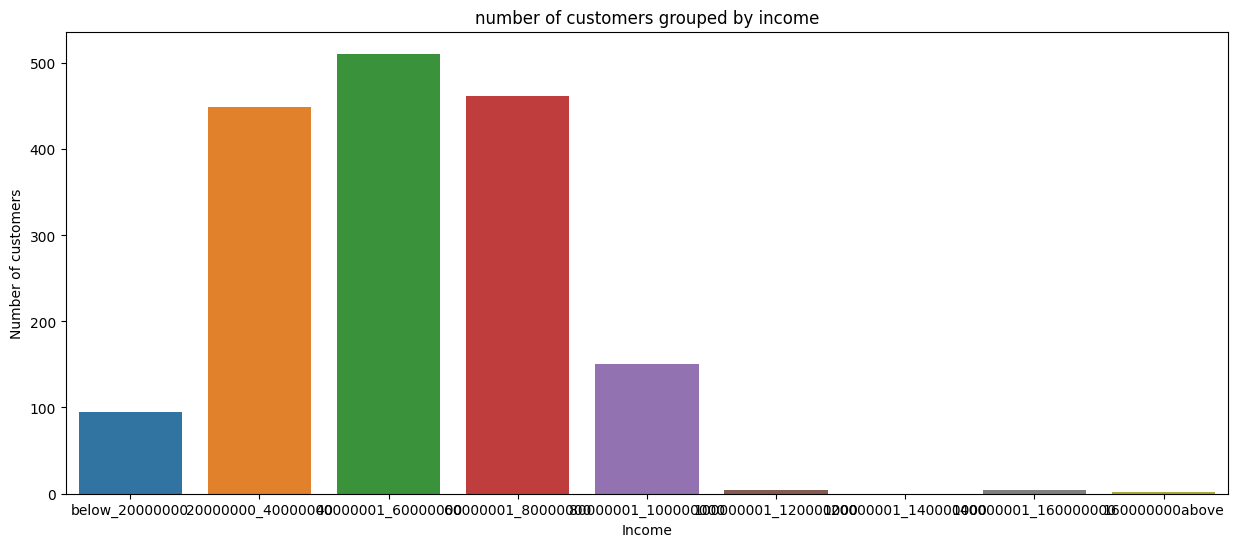

In [33]:
#Categorise customers by their income

below_20000000=trn_data["Income"][(trn_data["Income"]<20000000)]
incm_20000000_40000000=trn_data["Income"][(trn_data["Income"]>=20000000)&(trn_data["Income"]<=40000000)]
incm_40000001_60000000=trn_data["Income"][(trn_data["Income"]>40000001)&(trn_data["Income"]<=60000001)]
incm_60000001_80000000=trn_data["Income"][(trn_data["Income"]>60000001)&(trn_data["Income"]<=80000001)]
incm_80000001_100000000=trn_data["Income"][(trn_data["Income"]>80000001)&(trn_data["Income"]<=100000000)]
incm_100000001_120000000=trn_data["Income"][(trn_data["Income"]>100000001)&(trn_data["Income"]<=120000000)]
incm_120000001_140000000=trn_data["Income"][(trn_data["Income"]>120000001)&(trn_data["Income"]<=140000000)]
incm_140000001_160000000=trn_data["Income"][(trn_data["Income"]>140000001)&(trn_data["Income"]<=160000000)]
incm_160000000above=trn_data["Income"][(trn_data["Income"]>160000000)]
                                                           
incm_x=["below_20000000","20000000_40000000","40000001_60000000","60000001_80000000","80000001_100000000","100000001_120000000","120000001_140000000","140000001_160000000","160000000above"]
incm_y=[len(below_20000000.values),len(incm_20000000_40000000.values),len(incm_40000001_60000000.values),len(incm_60000001_80000000.values),len(incm_80000001_100000000.values),len(incm_100000001_120000000.values),len(incm_120000001_140000000.values),len(incm_140000001_160000000.values),len(incm_160000000above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=incm_x,y=incm_y)
plt.title("number of customers grouped by income")
plt.xlabel("Income")
plt.ylabel("Number of customers")
plt.show()

### 7.Feature Engineering

Feature engineering is the process of transforming data in to features that are suitable for machine learning models.In other words,it is the process of selecting,extracting and trsnsforming most relevent features from the available data to build more accurate and efficent machine learning models

###### Process involved in feature Engineering

    1.Feature creation
    2.Feature Extraction
    3.Feature Transform
    4.Feature Selection
    5.Feature scaling

2.Feature Extraction

In [18]:
#Creating some new features by combining other features

#Age of customer today 
trn_data["Age"] = 2023-trn_data["Year_Birth"]

#Total spendings on various items
trn_data["Spent"] = trn_data["MntCoke"]+ trn_data["MntFruits"]+ trn_data["MntMeatProducts"]+ trn_data["MntFishProducts"]+ trn_data["MntSweetProducts"]+ trn_data["MntGoldProds"]

#Feature indicating total children living in the household
trn_data["Children"]=trn_data["Kidhome"]+trn_data["Teenhome"]

#Segmenting education levels in three groups
trn_data["Education"]=trn_data["Education"].replace({"SMA":"Undergraduate","S1":"Graduate","D3":"Graduate","S2":"Postgraduate","S3":"Postgraduate"})
trn_data


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Children
0,5524,1957,BachelorDegree,Bachelor,58138000.0,0,0,2012-09-04,58,635000,...,0,0,0,0,3,11,1,66,1617000,0
1,2174,1954,BachelorDegree,Bachelor,46344000.0,1,1,2014-03-08,38,11000,...,0,0,0,0,3,11,0,69,27000,2
2,4141,1965,BachelorDegree,Engaged,71613000.0,0,0,2013-08-21,26,426000,...,0,0,0,0,3,11,0,58,776000,0
3,6182,1984,BachelorDegree,Engaged,26646000.0,1,0,2014-02-10,26,11000,...,0,0,0,0,3,11,0,39,53000,1
4,5324,1981,DoctoralDegree,Married,58293000.0,1,0,2014-01-19,94,173000,...,0,0,0,0,3,11,0,42,422000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,4712,1991,Diploma,Engaged,20193000.0,0,0,2012-11-28,18,8000,...,0,0,0,0,3,11,0,32,82000,0
1676,1170,1975,BachelorDegree,Married,27573000.0,1,0,2013-03-25,45,50000,...,0,0,0,0,3,11,0,48,244000,1
1677,6347,1979,SubjectMatterAcquaintance,Bachelor,15862000.0,1,0,2013-06-27,26,1000,...,0,0,0,0,3,11,0,44,36000,1
1678,4065,1976,DoctoralDegree,Married,49544000.0,1,0,2013-02-12,0,308000,...,0,0,0,0,3,11,0,47,404000,1


In [19]:
#Dropping some of the redundant features

to_drop = ["Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
trn_data = trn_data.drop(to_drop, axis=1)
trn_data.describe()


,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children
count,1.657000e+03,1657.000000,1657.000000,1657,1657.000000,1.657000e+03,1657.000000,1.657000e+03,1657.000000,1657.000000,...,1657.00000,1657.000000,1657.000000,1657.000000,1657.000000,1657.000000,1657.000000,1657.000000,1.657000e+03,1657.000000
mean,5.162982e+07,0.449608,0.499698,2013-07-11 02:17:18.503319296,49.069403,3.070338e+05,26059.746530,1.640670e+05,37229.330115,27072.420036,...,0.07242,0.074231,0.070006,0.062161,0.012070,0.010260,0.146047,54.175619,6.049403e+05,0.949306
min,1.730000e+06,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000e+00,0.000000,1.000000e+03,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,5.000000e+03,0.000000
25%,3.568400e+07,0.000000,0.000000,2013-01-17 00:00:00,24.000000,2.400000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000,7.000000e+04,0.000000
50%,5.112400e+07,0.000000,0.000000,2013-07-11 00:00:00,50.000000,1.770000e+05,8000.000000,6.800000e+04,12000.000000,8000.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000,3.930000e+05,1.000000
75%,6.789300e+07,1.000000,1.000000,2013-12-29 00:00:00,74.000000,5.040000e+05,32000.000000,2.330000e+05,49000.000000,32000.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,1.040000e+06,1.000000
max,1.054710e+08,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1.492000e+06,199000.000000,1.725000e+06,259000.000000,198000.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,130.000000,2.525000e+06,3.000000
std,2.054593e+07,0.545094,0.549621,NaN,28.904171,3.394535e+05,39623.050898,2.162265e+05,54409.882362,41319.300663,...,0.25926,0.262225,0.255234,0.241520,0.109232,0.100799,0.353260,12.050315,6.015990e+05,0.759696


3.Feature Transform

Machine learning models can pnly work with numerical values. For that it is necessary to transform the categorical values of the relevent features in to numerical ones . Here i use Label Encoder for feature transform 

In [20]:
#Get list of categorical variables

dtyp= (trn_data.dtypes == 'object')
dtyp_obj = list(dtyp[dtyp].index)
print("Categorical variables in the dataset are :\n",dtyp_obj)

Categorical variables in the dataset are :
 ['Education', 'Marital_Status']


In [21]:
# Feature encoding using label encoder

lbl_encdr=LabelEncoder()
for i in dtyp_obj:
    trn_data[i]=trn_data[[i]].apply(lbl_encdr.fit_transform)

5.Feature Scaling

In [24]:
#Creating a copy of data
copy_data_trn= trn_data.copy()

#create a subset of dataframe by dropping the features of deals accepted and promotion

cols_del_trn = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','Response','Complain','Dt_Customer']
copy_data_trn = copy_data_trn.drop(cols_del_trn, axis=1)

In [25]:
#Scaling
scaler = StandardScaler()
scaler.fit(copy_data_trn)
scaled_trn_data = pd.DataFrame(scaler.transform(copy_data_trn),columns= copy_data_trn.columns )
print("All features are now scaled")


scaled_trn_data.head()

All features are now scaled


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Children
0,-0.897462,-1.582027,0.316858,-0.825076,-0.909443,0.309066,0.966451,1.563710,1.766890,2.477700,1.475000,0.874314,0.352149,1.512398,2.617437,-0.561863,0.677235,0.981547,1.682791,-1.249963
1,-0.897462,-1.582027,-0.257346,1.010026,0.910542,-0.383085,-0.872353,-0.632645,-0.731246,-0.647676,-0.631189,-0.735985,-0.172591,-1.169501,-0.585471,-1.180266,-0.143371,1.230578,-0.960964,1.383462
2,-0.897462,0.245595,0.972904,-0.825076,-0.909443,-0.798375,0.350570,0.579137,-0.171478,1.356241,-0.147008,-0.029024,-0.697331,1.512398,-0.229592,1.293348,-0.553674,0.317464,0.284428,-1.249963
3,-0.897462,0.245595,-1.216366,1.010026,-0.909443,-0.798375,-0.872353,-0.556908,-0.666479,-0.500599,-0.582771,-0.755622,-0.172591,-0.786373,-0.941349,-0.561863,0.266932,-1.259735,-0.917732,0.066749
4,0.704148,0.854802,0.324405,1.010026,-0.909443,1.554937,-0.394971,0.427664,-0.213114,0.161245,-0.001753,-0.559244,1.401630,0.363013,0.126286,0.056541,-0.143371,-1.010703,-0.304182,0.066749


## Test data

All the steps that performed for training data is need to done in testing data also

In [26]:
tst_data.head()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1681,1681,5939,1971,S1,Bertunangan,38232000.0,1,1,17-01-2014,...,5,0,0,0,0,0,0,3,11,0
1,1682,1682,2156,1955,S3,Menikah,22554000.0,1,1,03-11-2012,...,5,0,0,0,0,0,0,3,11,0
2,1683,1683,7788,1983,S3,Menikah,23536000.0,1,0,04-06-2014,...,3,0,0,0,0,0,0,3,11,0
3,1684,1684,10323,1952,S1,Menikah,49413000.0,0,1,25-10-2013,...,5,0,0,0,0,0,0,3,11,0
4,1685,1685,7947,1969,S1,Menikah,42231000.0,1,1,25-03-2014,...,5,0,0,0,0,0,0,3,11,0


In [27]:
tst_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'Year_Birth', 'Education',
       'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')

In [28]:
tst_data.describe()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,559.000000,559.000000,559.000000,559.000000,5.520000e+02,559.000000,559.000000,559.000000,5.590000e+02,559.000000,...,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.0,559.0,559.000000
mean,1960.000000,1960.000000,5721.500894,1968.663685,5.291597e+07,0.420394,0.525939,49.187835,3.003488e+05,27293.381038,...,5.273703,0.076923,0.075134,0.084079,0.067979,0.017889,0.007156,3.0,11.0,0.164580
std,161.513673,161.513673,3269.336755,11.867607,3.397271e+07,0.511880,0.527682,29.109522,3.303610e+05,40361.180414,...,2.357450,0.266708,0.263844,0.277754,0.251935,0.132667,0.084363,0.0,0.0,0.371133
min,1681.000000,1681.000000,17.000000,1940.000000,4.023000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1820.500000,1820.500000,2850.500000,1958.500000,3.423900e+07,0.000000,0.000000,25.000000,2.300000e+04,2000.000000,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1960.000000,1960.000000,5631.000000,1970.000000,5.246300e+07,0.000000,1.000000,49.000000,1.750000e+05,8000.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,2099.500000,2099.500000,8603.500000,1977.000000,6.956550e+07,1.000000,1.000000,74.000000,5.140000e+05,35000.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,2239.000000,2239.000000,11187.000000,1995.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,194000.000000,...,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [29]:
tst_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0.1         559 non-null    int64  
 1   Unnamed: 0           559 non-null    int64  
 2   ID                   559 non-null    int64  
 3   Year_Birth           559 non-null    int64  
 4   Education            559 non-null    object 
 5   Marital_Status       559 non-null    object 
 6   Income               552 non-null    float64
 7   Kidhome              559 non-null    int64  
 8   Teenhome             559 non-null    int64  
 9   Dt_Customer          559 non-null    object 
 10  Recency              559 non-null    int64  
 11  MntCoke              559 non-null    int64  
 12  MntFruits            559 non-null    int64  
 13  MntMeatProducts      559 non-null    int64  
 14  MntFishProducts      559 non-null    int64  
 15  MntSweetProducts     559 non-null    int

In [30]:
tst_data.isnull().sum()

Unnamed: 0.1           0
Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 7
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [31]:

# calculate inter quartile range(IQR)

tst_income=tst_data['Income']
Q1=tst_income.quantile(0.25)
Q3=tst_income.quantile(0.75)
IQR=Q3-Q1

#calculate the minimum and maximum range of outliers

min=Q1-1.5*IQR
max=Q3+1.5*IQR

#to display outliers

tst_outliers=tst_data[(tst_income<min)|(tst_income>max)]
tst_outliers_income=tst_outliers['Income']
print("outliers in the income column are :\n",tst_outliers_income)


outliers in the income column are :
 451    156924000.0
552    666666000.0
Name: Income, dtype: float64


In [32]:
#Remove this outliers from the test data

tst_data_no_outliers=tst_data[(tst_income>=min)&(tst_income<=max)]
print("data without outliers :\n",tst_data_no_outliers['Income'])
      

data without outliers :
 0      38232000.0
1      22554000.0
2      23536000.0
3      49413000.0
4      42231000.0
          ...    
554    61223000.0
555    64014000.0
556    56981000.0
557    69245000.0
558    52869000.0
Name: Income, Length: 550, dtype: float64


In [33]:
#Finding mean value for column Income

tst_incm_mean=tst_data['Income'].mean()
print(tst_incm_mean)

52915971.01449275


In [34]:
#replace this mean for null values
tst_data = tst_data.dropna()
tst_data['Income'].fillna(tst_incm_mean,inplace=True)
tst_data.isnull().sum()

Unnamed: 0.1           0
Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

2.Remove unwanted columns

In [35]:
# dropping 2 unwanted columns from testing data

tst_data = tst_data.drop(['Unnamed: 0.1', 'Unnamed: 0'],axis='columns')

3.Change data type  from object

In [36]:
# converting dtype of Dt_Customer to dtype datetime

tst_data["Dt_Customer"] = pd.to_datetime(tst_data["Dt_Customer"],format='%d-%m-%Y')
tst_data.info()



<class 'pandas.core.frame.DataFrame'>
Index: 552 entries, 0 to 558
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   552 non-null    int64         
 1   Year_Birth           552 non-null    int64         
 2   Education            552 non-null    object        
 3   Marital_Status       552 non-null    object        
 4   Income               552 non-null    float64       
 5   Kidhome              552 non-null    int64         
 6   Teenhome             552 non-null    int64         
 7   Dt_Customer          552 non-null    datetime64[ns]
 8   Recency              552 non-null    int64         
 9   MntCoke              552 non-null    int64         
 10  MntFruits            552 non-null    int64         
 11  MntMeatProducts      552 non-null    int64         
 12  MntFishProducts      552 non-null    int64         
 13  MntSweetProducts     552 non-null    int

In [37]:
#Handling categorical variables

print("Total categories in the feature Marital_Status:\n",tst_data["Marital_Status"].value_counts(), "\n")


Total categories in the feature Marital_Status:
 Marital_Status
Menikah        213
Bertunangan    138
Lajang         122
Cerai           55
Janda           24
Name: count, dtype: int64 



In [38]:
# Replacing marital status with english synonyms

tst_data["Marital_Status"] =tst_data['Marital_Status'].replace('Menikah','Married')
tst_data["Marital_Status"] =tst_data['Marital_Status'].replace('Bertunangan','Engaged')
tst_data["Marital_Status"] =tst_data['Marital_Status'].replace('Lajang','Bachelor')
tst_data["Marital_Status"] =tst_data['Marital_Status'].replace('Cerai','Divorced')
tst_data["Marital_Status"] =tst_data['Marital_Status'].replace('Janda','Widows')

tst_data["Marital_Status"].value_counts()

Marital_Status
Married     213
Engaged     138
Bachelor    122
Divorced     55
Widows       24
Name: count, dtype: int64

In [39]:
# Replacing educational qualification with english synonyms

tst_data["Education"]=tst_data['Education'].replace('S1','BachelorDegree')
tst_data["Education"]=tst_data['Education'].replace('S2','MasterDegree')
tst_data["Education"]=tst_data['Education'].replace('S3','DoctoralDegree')
tst_data["Education"]=tst_data['Education'].replace('D3','Diploma')
tst_data["Education"]=tst_data['Education'].replace('SMA','SubjectMatterAcquaintance')
tst_data["Education"].value_counts()

Education
BachelorDegree               290
DoctoralDegree               112
MasterDegree                  88
Diploma                       43
SubjectMatterAcquaintance     19
Name: count, dtype: int64

In [40]:
#Creating some new features by combining other features

#Age of customer today 
tst_data["Age"] = 2023-tst_data["Year_Birth"]

#Total spendings on various items
tst_data["Spent"] = tst_data["MntCoke"]+ tst_data["MntFruits"]+ tst_data["MntMeatProducts"]+ tst_data["MntFishProducts"]+ tst_data["MntSweetProducts"]+ tst_data["MntGoldProds"]

#Feature indicating total children living in the household
tst_data["Children"]=tst_data["Kidhome"]+tst_data["Teenhome"]

#Segmenting education levels in three groups
tst_data["Education"]=tst_data["Education"].replace({"SMA":"Undergraduate","S1":"Graduate","D3":"Graduate","S2":"Postgraduate","S3":"Postgraduate"})

tst_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Children
0,5939,1971,BachelorDegree,Engaged,38232000.0,1,1,2014-01-17,84,43000,...,0,0,0,0,3,11,0,52,122000,2
1,2156,1955,DoctoralDegree,Married,22554000.0,1,1,2012-11-03,38,27000,...,0,0,0,0,3,11,0,68,41000,2
2,7788,1983,DoctoralDegree,Married,23536000.0,1,0,2014-06-04,53,6000,...,0,0,0,0,3,11,0,40,10000,1
3,10323,1952,BachelorDegree,Married,49413000.0,0,1,2013-10-25,88,205000,...,0,0,0,0,3,11,0,71,304000,1
4,7947,1969,BachelorDegree,Married,42231000.0,1,1,2014-03-25,99,24000,...,0,0,0,0,3,11,0,54,37000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,10870,1967,BachelorDegree,Married,61223000.0,0,1,2013-06-13,46,709000,...,0,0,0,0,3,11,0,56,1341000,1
555,4001,1946,DoctoralDegree,Engaged,64014000.0,2,1,2014-06-10,56,406000,...,0,1,0,0,3,11,0,77,444000,3
556,7270,1981,BachelorDegree,Divorced,56981000.0,0,0,2014-01-25,91,908000,...,0,0,0,0,3,11,0,42,1241000,0
557,8235,1956,MasterDegree,Engaged,69245000.0,0,1,2014-01-24,8,428000,...,0,0,0,0,3,11,0,67,843000,1


In [41]:
#Dropping some of the redundant features

to_drop = ["Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
tst_data = tst_data.drop(to_drop, axis=1)
tst_data.describe()



,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children
count,5.520000e+02,552.000000,552.000000,552,552.000000,5.520000e+02,552.000000,552.000000,552.000000,552.000000,...,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,5.520000e+02,552.000000
mean,5.291597e+07,0.420290,0.525362,2013-07-08 13:00:00,48.865942,3.015163e+05,27329.710145,168025.362319,39157.608696,27041.666667,...,0.077899,0.074275,0.083333,0.068841,0.018116,0.007246,0.164855,54.282609,6.088659e+05,0.945652
min,4.023000e+06,0.000000,0.000000,2012-08-01 00:00:00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,8.000000e+03,0.000000
25%,3.423900e+07,0.000000,0.000000,2013-01-11 18:00:00,24.000000,2.300000e+04,2000.000000,15000.000000,3000.000000,2000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000,6.775000e+04,0.000000
50%,5.246300e+07,0.000000,1.000000,2013-07-06 12:00:00,48.500000,1.755000e+05,8000.000000,65500.000000,12000.000000,8000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000,4.065000e+05,1.000000
75%,6.956550e+07,1.000000,1.000000,2014-01-10 06:00:00,73.250000,5.167500e+05,35000.000000,223750.000000,55000.000000,37250.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.000000,1.055750e+06,1.000000
max,6.666660e+08,2.000000,2.000000,2014-06-28 00:00:00,99.000000,1.493000e+06,194000.000000,981000.000000,258000.000000,262000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,83.000000,2.257000e+06,3.000000
std,3.397271e+07,0.512091,0.528060,NaN,29.102986,3.316815e+05,40313.427052,222384.722661,55995.872418,40407.588586,...,0.268255,0.262456,0.276636,0.253412,0.133492,0.084894,0.371386,11.843038,6.031367e+05,0.715868


In [42]:
#Get list of categorical variables

dtyp= (tst_data.dtypes == 'object')
dtyp_obj = list(dtyp[dtyp].index)
print("Categorical variables in the dataset are :\n",dtyp_obj)

Categorical variables in the dataset are :
 ['Education', 'Marital_Status']


In [43]:
# Feature encoding using label encoder

lbl_encdr=LabelEncoder()
for i in dtyp_obj:
    tst_data[i]=trn_data[[i]].apply(lbl_encdr.fit_transform)

In [44]:
#Creating a copy of data
copy_data_tst= tst_data.copy()

#create a subset of dataframe by dropping the features of deals accepted and promotion

cols_del_tst = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response','Dt_Customer']
copy_data_tst = copy_data_tst.drop(cols_del_tst, axis=1)

In [45]:
#Scaling
scaler = StandardScaler()
scaler.fit(copy_data_tst)
scaled_tst_data = pd.DataFrame(scaler.transform(copy_data_tst),columns= copy_data_tst.columns )
print("All features are now scaled")

scaled_tst_data.head()



All features are now scaled


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Children
0,-0.877084,-1.593277,-0.432621,1.133072,0.899648,1.208327,-0.780118,-0.554405,-0.630225,-0.574806,-0.521208,-0.235045,0.943320,-0.397244,-0.591589,-0.858622,-0.121230,-0.192913,-0.807955,1.474160
1,-0.877084,-1.593277,-0.894527,1.133072,0.899648,-0.373700,-0.828401,-0.678546,-0.711239,-0.699929,-0.669829,-0.767766,0.943320,-0.721620,-0.956051,-0.552842,-0.121230,1.159317,-0.942375,1.474160
2,-0.877084,0.226645,-0.865595,1.133072,-0.995794,0.142178,-0.891772,-0.678546,-0.742745,-0.699929,-0.669829,-0.822875,-0.702768,-1.370373,-0.956051,-0.858622,-0.973704,-1.207086,-0.993820,0.075988
3,-0.877084,0.226645,-0.103205,-0.821477,0.899648,1.345895,-0.291255,-0.504749,-0.571715,-0.646305,-0.620289,0.003760,-0.154072,-0.072867,-0.227128,-0.247062,-0.121230,1.412860,-0.505926,0.075988
4,0.733398,0.833285,-0.314802,1.133072,0.899648,1.724206,-0.837454,-0.678546,-0.720241,-0.699929,-0.645059,-0.767766,-0.702768,-1.045997,-0.956051,-0.858622,-0.121230,-0.023884,-0.949013,1.474160


###  8.Diamensionality Reduction

In [46]:
pca=PCA(n_components=3)
pca.fit(scaled_trn_data)
pca_trn=pd.DataFrame(pca.transform(scaled_trn_data),columns=(['col1','col2','col3']))
pca_trn.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,1657.0,-4.502534e-17,2.773010,-5.003820,-2.531495,-0.762220,2.425943,7.355335
col2,1657.0,1.072032e-17,1.523240,-2.902638,-1.296088,-0.171371,1.057360,5.720480
col3,1657.0,7.289817e-17,1.143744,-4.441830,-0.799140,0.007574,0.738165,4.795376


In [47]:
scaled_tst_data = scaled_tst_data.dropna()
pca_tst=PCA(n_components=3)
pca.fit(scaled_tst_data)
PCA_tst=pd.DataFrame(pca.transform(scaled_tst_data),columns=(['col1','col2','col3']))
PCA_tst.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,538.0,0.000000e+00,2.668185,-5.431751,-2.413356,-0.749670,2.240592,6.759815
col2,538.0,-8.584624e-17,1.509136,-2.830815,-1.314742,-0.061491,1.157972,4.995481
col3,538.0,3.466867e-17,1.149040,-3.300097,-0.806534,-0.027342,0.771981,4.804030


### 9.Clustering

Clustering is a data science technique in machine learning that groups similar rows in a data set. After running a clustering technique, a new column appears in the data set to indicate the group each row of data fits into best.

###### Steps involved in the Clustering:

         1.Elbow Method to determine the number of clusters to be formed
         2.Clustering via Agglomerative Clustering
         3.Examining the clusters formed via scatter plot

1.Elbow Method to determine the number of clusters to be formed:

              One of the most popular ways to find the optimal number of clusters,k.Elbow mwthod is a technique that we use to determine the number of centroids(k) to use in k-means clustering algorithem

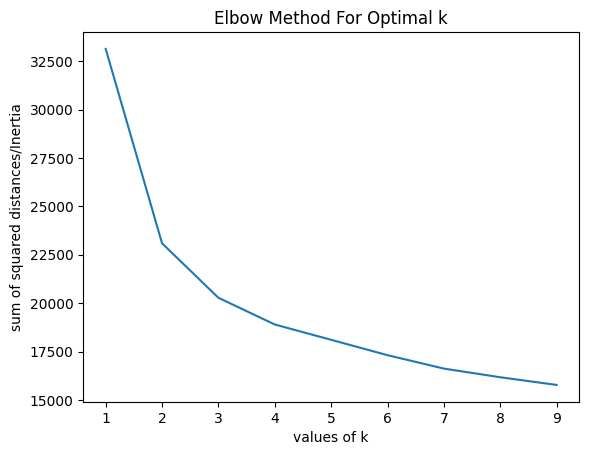

In [48]:
sum_of_squared_distances=[]
k=range(1,10)
for num_clusters in k:
    kmeans=KMeans(n_clusters=num_clusters)
    kmeans.fit(scaled_trn_data)
    sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(k,sum_of_squared_distances)
plt.xlabel('values of k')
plt.ylabel('sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

Frome this we get ideal cluster count for this dataset is 4

2.Clustering via Agglomerative Clustering:

         Agglomerative clustering is a type of Hierarchical clustering.Hierachichal clustering is a connectivity-based clustering model that groups the data points together that are close to each other based on the measurebof similarity or distance.Agglomerative is a bottom-up approach,in hich the algorithm starts with taking all data points as single lusteers and then suceessively agglomerate pairs of clusters have been merged in to asingle cluster that contains all data

In [49]:
# Calculate sihouette score 

score = silhouette_score(scaled_trn_data, kmeans.labels_, metric='euclidean')
score

0.12499728630167962

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

Typically, mean silhouette over 0.6 is considered a "good" clustering solution.

In [50]:
#Initiating the Agglomerative Clustering model with k=4
AC = AgglomerativeClustering(n_clusters=4)

# fit model and predict clusters
trn_AC = AC.fit_predict(pca_trn)
pca_trn["Clusters"] = trn_AC

#Adding the Clusters feature to the orignal dataframe.
trn_data["Clusters"]= trn_AC
print(trn_AC)

[3 0 3 ... 0 0 0]


In [51]:
scaled_tst_data = scaled_tst_data.dropna()
tst_data = tst_data.dropna()
test_AC = AC.fit_predict(scaled_tst_data)
PCA_tst["Clusters"] = test_AC
tst_data["Clusters"]= test_AC

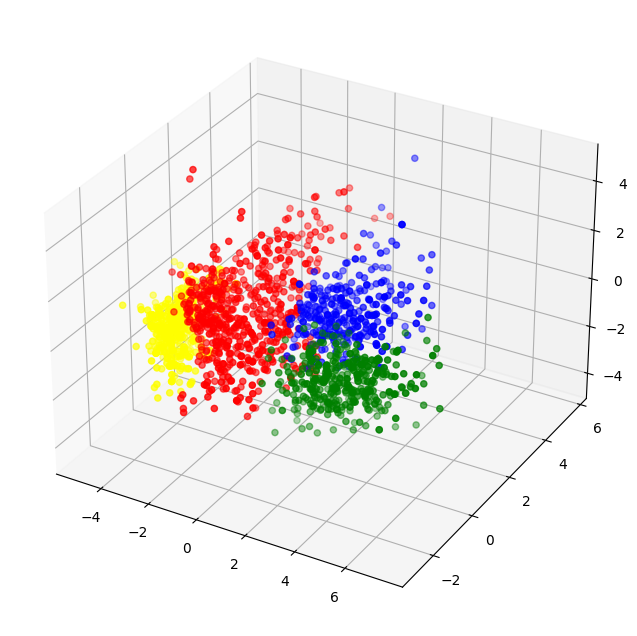

In [51]:
# 3D distribution of clusters for training data
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')

#Define colour of each clusters
color=['red','blue','green','yellow']

#iterate through each cluster and plot data points
for i in range(4):
    clustr_data=pca_trn[pca_trn['Clusters']==i]
    ax.scatter(clustr_data['col1'],clustr_data['col2'],clustr_data['col3'],c=color[i],label=f'Cluster{i}')
    
x=clustr_data["col1"]
y=clustr_data["col2"]
z=clustr_data["col3"]   

ax.legend
plt.show()

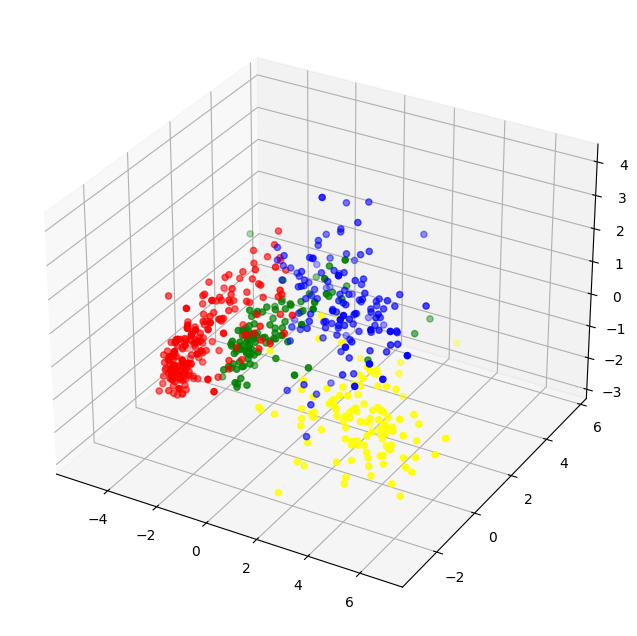

In [147]:
# 3D distribution of clusters for testing data
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')

#Define colour of each clusters
color=['red','blue','green','yellow']

#iterate through each cluster and plot data points
for i in range(4):
    clustr_data=PCA_tst[PCA_tst['Clusters']==i]
    ax.scatter(clustr_data['col1'],clustr_data['col2'],clustr_data['col3'],c=color[i],label=f'Cluster{i}')
    
x=clustr_data["col1"]
y=clustr_data["col2"]
z=clustr_data["col3"]   

ax.legend
plt.show()

### 10.Evaluating models

Text(0.5, 1.0, 'Distribution Of The Clusters for test data')

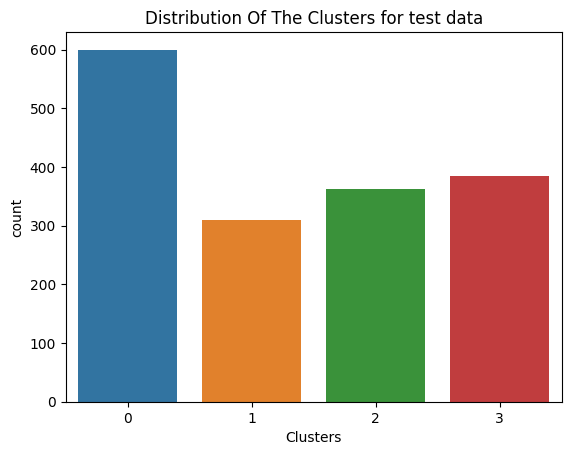

In [52]:
pl = sns.countplot(x=trn_data["Clusters"])
pl.set_title("Distribution Of The Clusters for test data")

Text(0.5, 1.0, 'Distribution Of The Clusters for test data')

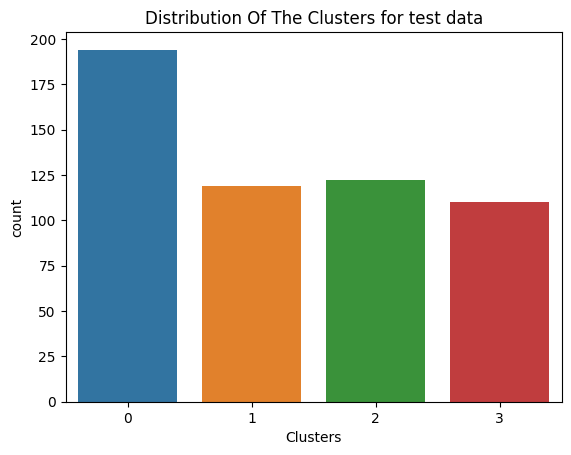

In [54]:
pl = sns.countplot(x=tst_data["Clusters"])
pl.set_title("Distribution Of The Clusters for test data")

The clusters seem to be fairly distributed

Text(0.5, 1.0, "Cluster's Profile Based On Income And Spending - train")

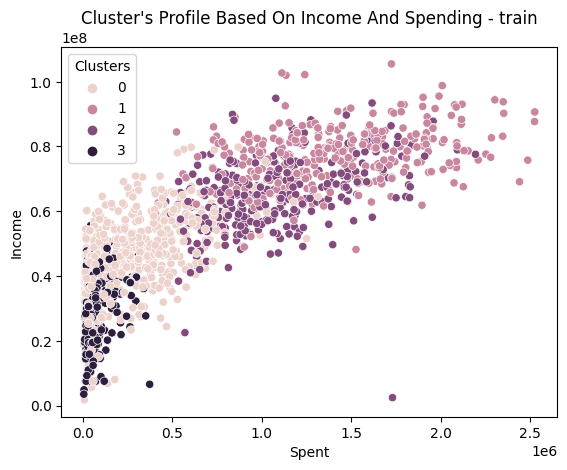

In [150]:
pl = sns.scatterplot(data = trn_data,x=trn_data["Spent"], y=trn_data["Income"],hue=trn_data["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending - train")

Text(0.5, 1.0, "Cluster's Profile Based On Income And Spending - train")

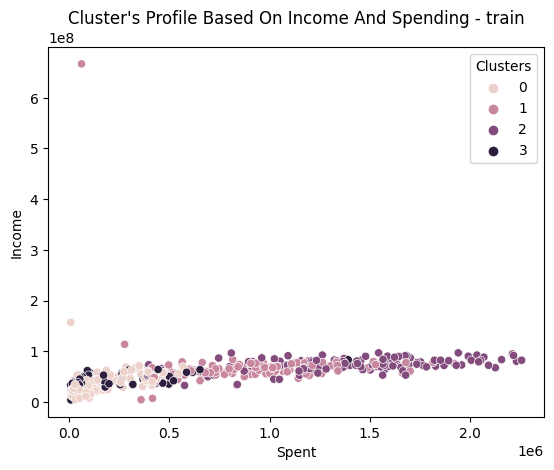

In [55]:
pl = sns.scatterplot(data = tst_data,x=tst_data["Spent"], y=tst_data["Income"],hue=tst_data["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending - train")

The income v/s Spending plot provides pattern of cluster,that is:
     
      Group 0: Low income and low spending
      Group 1: High income and high spending
      Group 2: High income and low spending
      Group 3: Average income and average spending

Text(0.5, 0, 'Number Of Total Accepted Promotions')

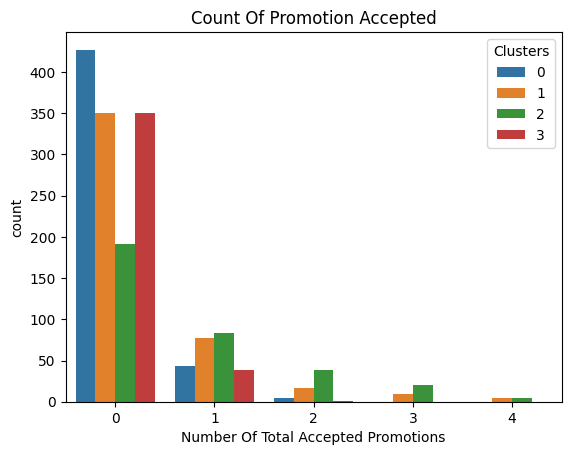

In [226]:
#Creating a feature to get a sum of accepted promotions for train data 
trn_data["Total_Promos"] = trn_data["AcceptedCmp1"]+ trn_data["AcceptedCmp2"]+ trn_data["AcceptedCmp3"]+ trn_data["AcceptedCmp4"]+ trn_data["AcceptedCmp5"]

#Plotting count of total campaign accepted.
pl = sns.countplot(x=trn_data["Total_Promos"],hue=trn_data["Clusters"])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")

Text(0.5, 0, 'Number Of Total Accepted Promotions')

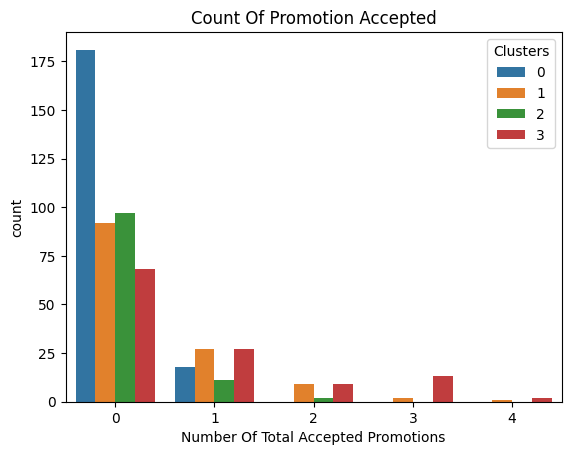

In [67]:
#Creating a feature to get a sum of accepted promotions for test data 
tst_data["Total_Promos"] = tst_data["AcceptedCmp1"]+ tst_data["AcceptedCmp2"]+ tst_data["AcceptedCmp3"]+ tst_data["AcceptedCmp4"]+ tst_data["AcceptedCmp5"]

#Plotting count of total campaign accepted.
pl = sns.countplot(x=tst_data["Total_Promos"],hue=tst_data["Clusters"])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")

There isnt any overwhelming response to the campaigns so far. There are only a few participants overall. Moreover, no one has taken part in all 5 of them. Perhaps better-targeted and well-planned campaigns are required to boost sales.


Text(0.5, 1.0, 'Number of Deals Purchased')

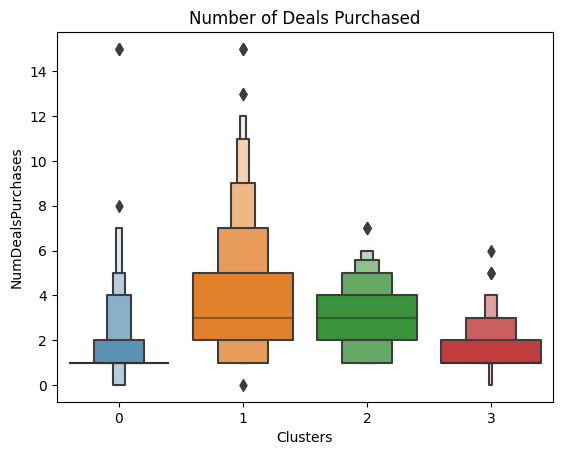

In [70]:
#Plotting number of deals purchased

plt.figure()
pl=sns.boxenplot(y=trn_data["NumDealsPurchases"],x=trn_data["Clusters"])
pl.set_title("Number of Deals Purchased")

It has best outcomex with cluster 0 and cluster 1

### 11.Profiling the clusters

    The goal of Profiling is to be able to differentiate between the groups with the proper distinction that means each group has some unique characteristics about it and then that cluster is the ideal solution to segment the values.
    in this project its done to  get an idea about who are valuable customer and who needs more attention from the retail store's marketing team. Plotting some of the features that indicates customer's personal traits based on the cluster they are in.

<Figure size 640x480 with 0 Axes>

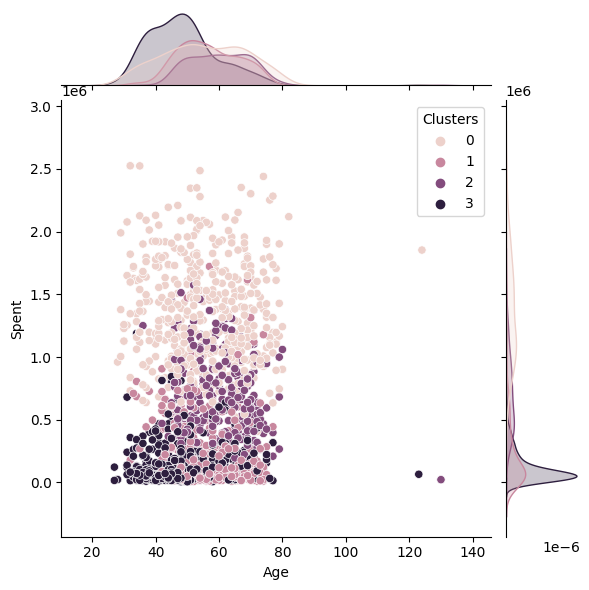

<Figure size 640x480 with 0 Axes>

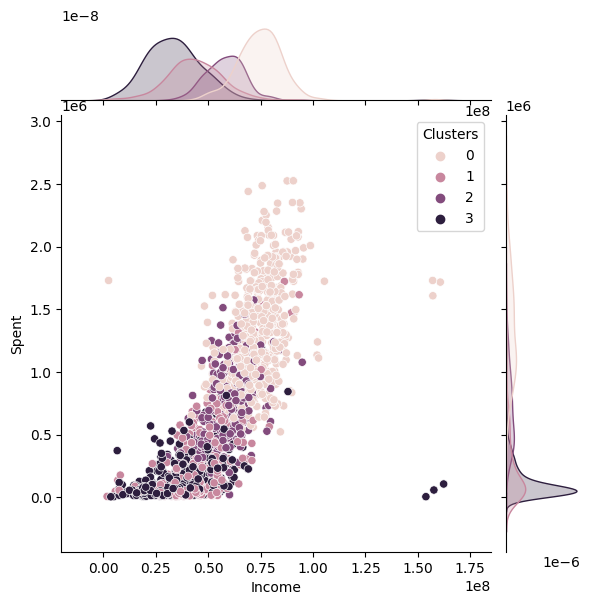

<Figure size 640x480 with 0 Axes>

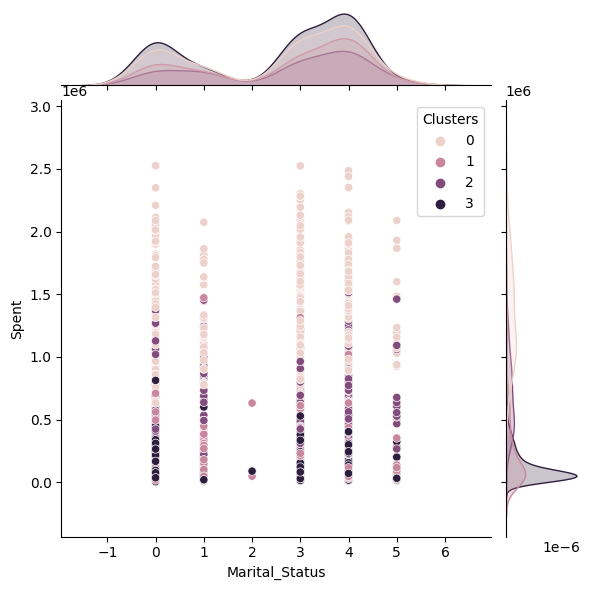

<Figure size 640x480 with 0 Axes>

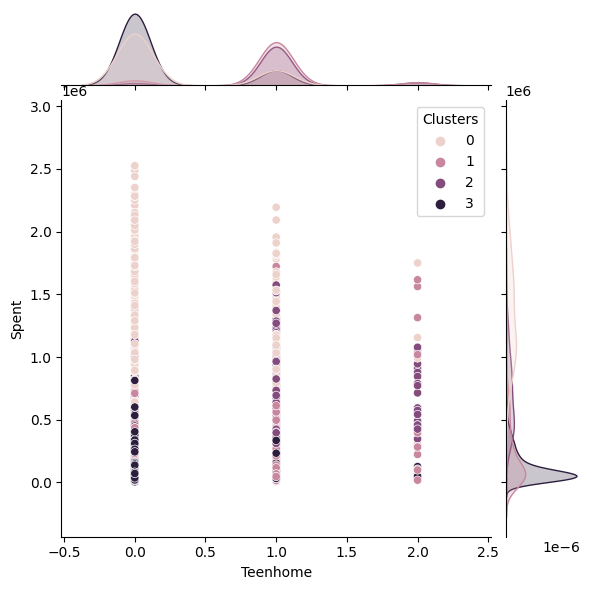

<Figure size 640x480 with 0 Axes>

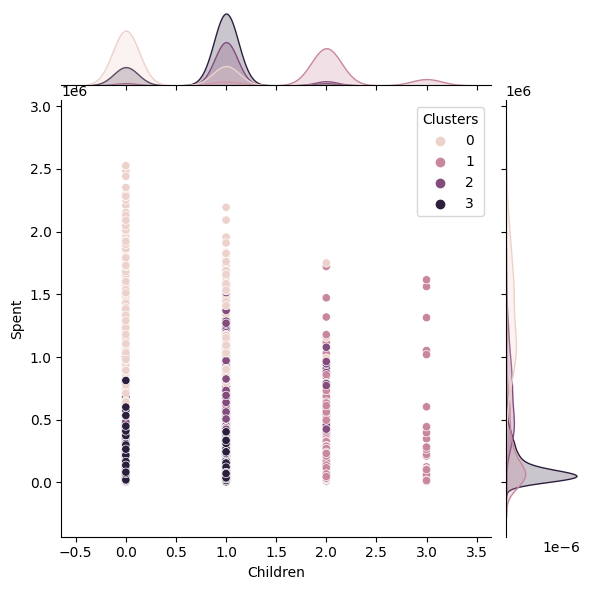

<Figure size 640x480 with 0 Axes>

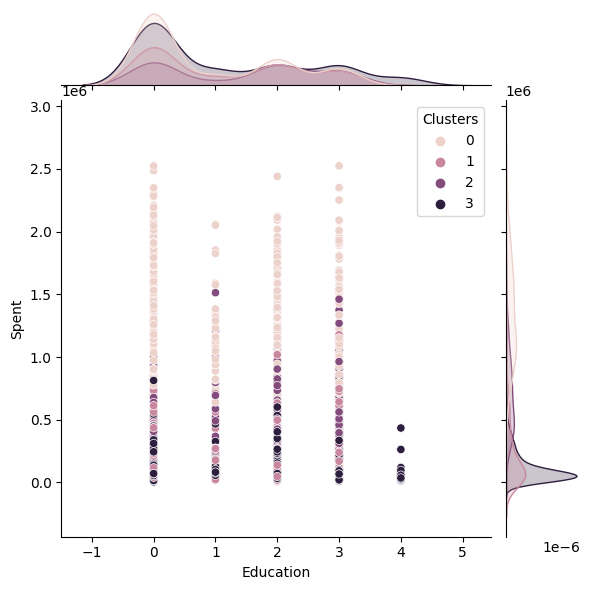

In [72]:
Features = ["Age","Income", "Marital_Status", "Teenhome","Children","Education"]

for i in Features:
    plt.figure()
    sns.jointplot(x=trn_data[i], y=trn_data["Spent"], hue =trn_data["Clusters"], kind="scatter")
    plt.show()

### 12.Classification

Trying the classification using Random Forest Classifier

In [52]:
trn_data.head()
trn_data.shape

(1657, 29)

In [56]:
scaled_trn_data.shape

(1657, 20)

In [53]:
tst_data.head()
tst_data.shape

(538, 29)

In [54]:
scaled_tst_data.shape

(538, 20)

In [55]:
scaled_trn_data["Response"] = trn_data["Response"]
scaled_trn_data["Response"].unique()

array([ 1.,  0., nan])

In [56]:
scaled_trn_data = scaled_trn_data.dropna()

In [57]:
# Classifying based on response for promotion

scaled_tst_data["Response"] = tst_data["Response"]
scaled_tst_data = scaled_tst_data.dropna()

In [58]:
target = ["Response"]
x_train = scaled_trn_data.drop(target, axis=1)
y_train = scaled_trn_data[target]


In [59]:
x_test = scaled_tst_data.drop(target,axis=1)
y_test = scaled_tst_data[target]


In [60]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [61]:
model.score(x_train,y_train)

0.9840881272949816

The value suggest that the model is making correct prediction on 98% of the training data points

In [62]:
model.score(x_test,y_test)


0.8305084745762712

The value suggest that the model is making correct prediction on 83% of the test data points

### 13.Conclusion

The dataset is analysed and segmented using unsupervised clustering. The whole customers are categorized in to 4 clusters based on their income, age and family background. This can be made use by the company to plan their products and promotions.